## SERIES DE TIEMPO PARA PRONÓSTICOS EN ECONOMÍA Y FINANZAS
### CLASE 6: Dinámica de Varianza Condicional

<div style="text-align: right"> Elaborado por Jorge Guerra </div>
<div style="text-align: right"> @jguerrae18 </div>
<div style="text-align: right"> ja.guerrae@uniandes.edu.co </div>

In [1]:
import warnings 
warnings.filterwarnings("ignore") #código para ignorar los anuncios de alertas

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

> **¿Qué haremos el día de hoy?**


El análisis se basará en una sola variable. La tasa de desempleo mensual en Colombia desde enero del año 2001 hasta el mes de noviembre del año 2019. La fuente de datos es el Departamento Administrativo Nacional de Estadística y la tasa de desempleo es la total Nacional. el código se dividirá en las siguientes secciones:


1. Exploración inicial
2. Modelos de brecha: AR(1).
3. Prónosticos fuera de muestra.
4. Criterios de selección.
5. Modelo estacionales y prónostico fuera de muestra.
6. Criterios de Selección de los modelos
---


In [2]:
#IMPORTANDO LOS PAQUETES MÁS IMPORTANTES. RECORDANDO

import pandas as pd #Pandas para el procesamiento de los datos
import matplotlib.pyplot as plt #Matplotlib para gráficar
import seaborn as sns #Seaborn para gráficar
import numpy as np #Numpy para el procesamiento númerico

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,  plot_pacf

In [35]:
df = pd.read_excel("desempleo.xlsx") #leer base de datos

In [36]:
df["FECHA"] = pd.to_datetime(df["FECHA"]) #convertir en formato fecha
df = df.set_index("FECHA") #fijar la fecha como un índice ( ya no como columna)
df.index.freq = "MS" #Fijar frecuencia mensual

In [37]:
df.describe() #descripción de la variable

,TD
count,227.000000
mean,11.380231
std,2.221838
min,7.270971
25%,9.613118
50%,11.120036
75%,12.793838
max,17.872714


## 1. Exploración inicial

Gráfica

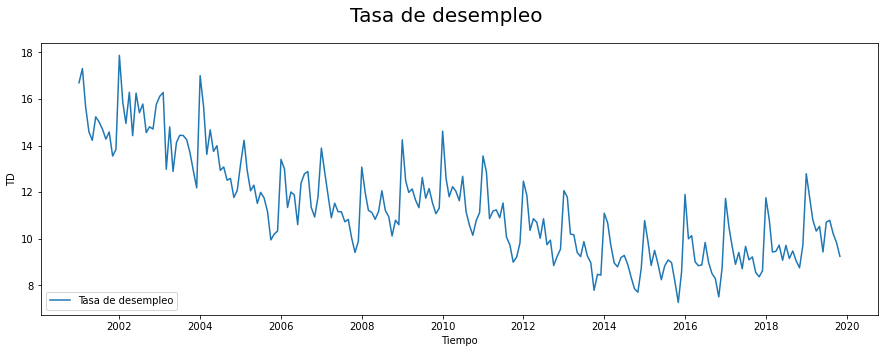

In [38]:
fig = plt.figure( figsize=(15,5))
fig.suptitle('Tasa de desempleo', fontsize=20)

plt.xlabel('Tiempo', fontsize=10)
plt.ylabel('TD', fontsize=10)
sns.lineplot(data = df, y = "TD", x = "FECHA", dashes= True, err_style ="bars")

plt.legend(loc='lower left', labels=['Tasa de desempleo'])

fig.show()

Modelos con tendencia cuadrática

$TD_{t}=\beta_{0}+\beta_{1}TIME_{t}+\beta_{2}TIME_{t}^{_{2}}$

In [ ]:
import statsmodels.api as sm 

In [ ]:
df["TIME"] = np.arange(1,228) 
df["TIME2"] = df["TIME"]**2

In [ ]:
X1 = df[["TIME", "TIME2"]]
X1 = sm.add_constant(X1)

modeltq = sm.OLS(df["TD"], X1).fit() #ESTIMAR EL MODELO
print(modeltq.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS

                            OLS Regression Results                            
Dep. Variable:                     TD   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     294.6
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.92e-63
Time:                        08:12:39   Log-Likelihood:                -356.48
No. Observations:                 227   AIC:                             719.0
Df Residuals:                     224   BIC:                             729.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9103      0.235     67.620      0.0

Text(0.5, 1.0, '$TD_{t}=\\beta_{0}+\\beta_{1}TIME_{t}+\\beta_{2}TIME_{t}^{_{2}}$')

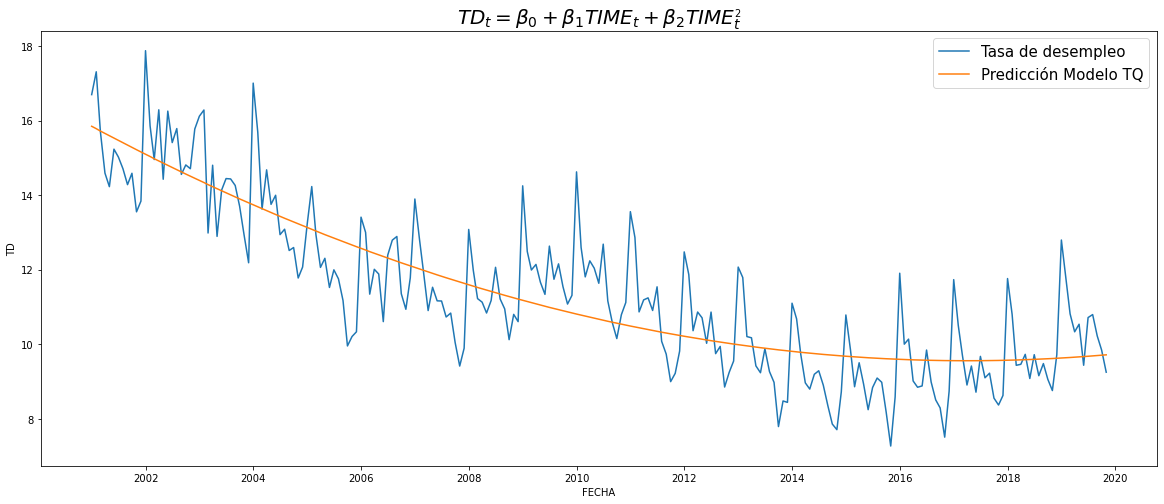

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((20,8))

sns.lineplot(x=df.index, y=df.TD)
sns.lineplot(x=df.index, y=modeltq.fittedvalues)
plt.legend(labels=['Tasa de desempleo', 'Predicción Modelo TQ'], prop={'size': 15})
plt.title(r"$TD_{t}=\beta_{0}+\beta_{1}TIME_{t}+\beta_{2}TIME_{t}^{_{2}}$", fontsize=20)

Efectos estacionales

In [39]:
df["MES"] = df.index
df["MES"] = df["MES"].dt.month
df = pd.concat([df, pd.get_dummies(df["MES"])], axis = 1)
# df = df.drop(columns = "MES")

In [40]:
df.head()

,TD,MES,1,2,3,4,5,6,7,8,9,10,11,12
FECHA,,,,,,,,,,,,,,
2001-01-01,16.694680,1,1,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,17.307023,2,0,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,15.705056,3,0,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,14.589864,4,0,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,14.226299,5,0,0,0,0,1,0,0,0,0,0,0,0


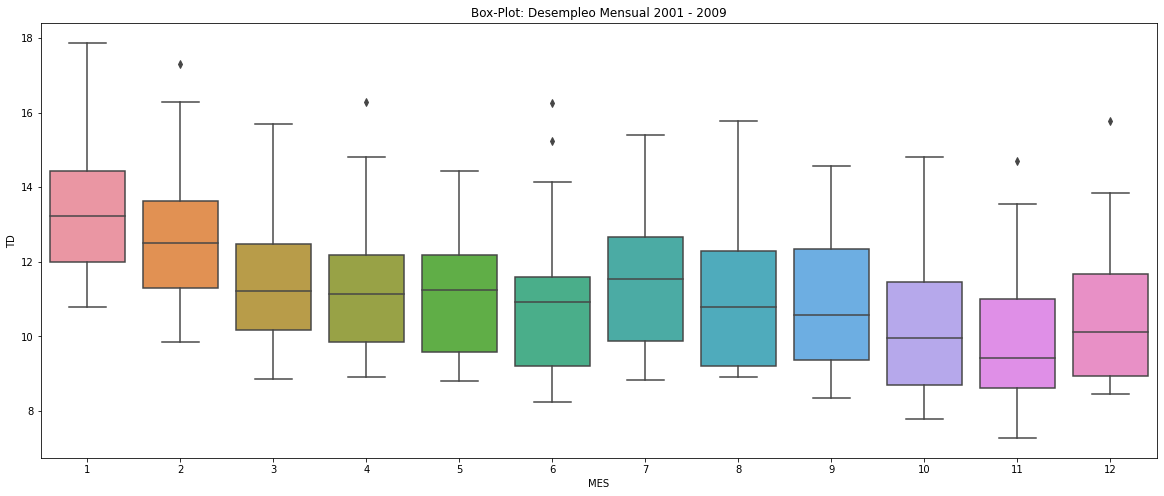

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches((20,8))

plt.title("Box-Plot: Desempleo Mensual 2001 - 2009")

sns.boxplot(x='MES',y='TD',data=df,ax=ax)
plt.show()

Estimación de Modelo Lineal-Estacional y análisis de errores

In [60]:
X1 = df[["TIME", "TIME2",  2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
X1 = sm.add_constant(X1)

modeltqt = sm.OLS(df["TD"], X1).fit() #ESTIMAR EL MODELO
print(modeltqt.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS

                            OLS Regression Results                            
Dep. Variable:                     TD   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     116.7
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           3.69e-89
Time:                        08:18:48   Log-Likelihood:                -265.07
No. Observations:                 227   AIC:                             558.1
Df Residuals:                     213   BIC:                             606.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9117      0.237     75.528      0.0

In [62]:
residuales = modeltqt.resid

Analisis residuales

Text(0, 0.5, 'PACF')

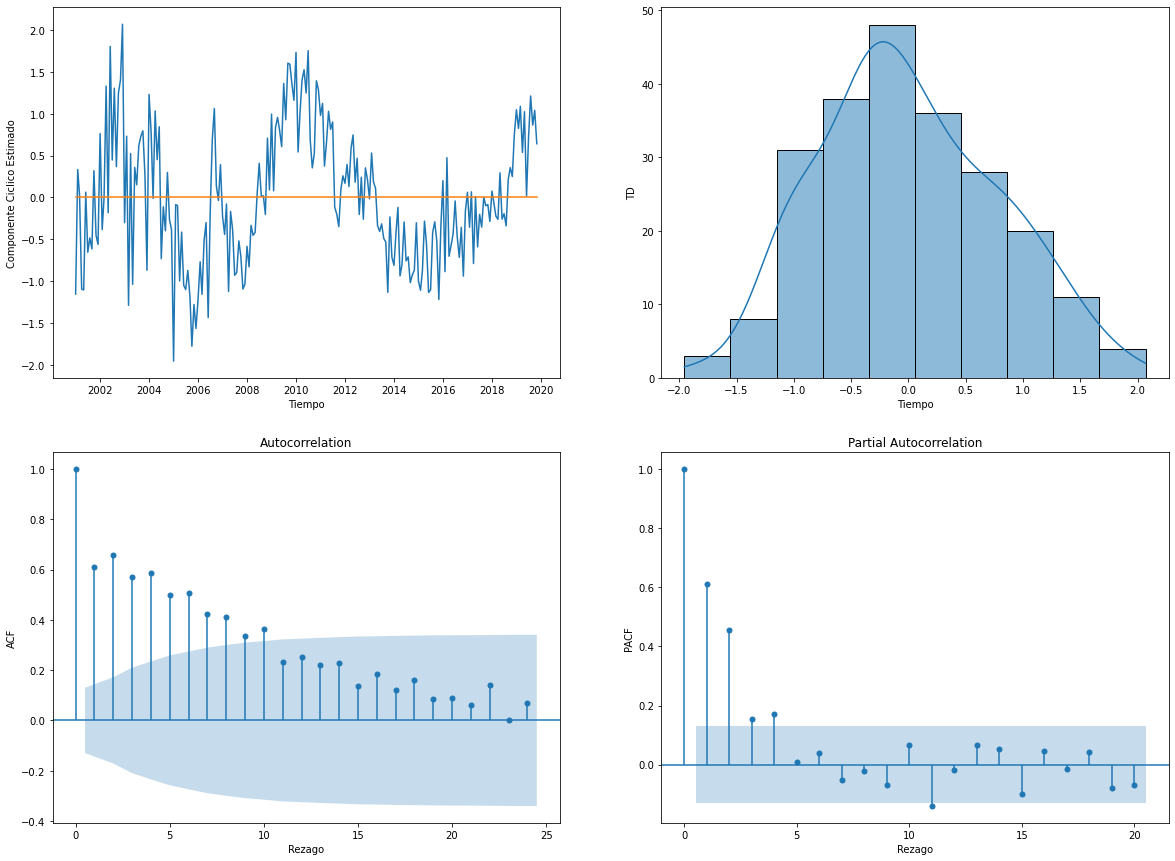

In [67]:
#Inspección gráfica

fig, ax =plt.subplots(2,2, figsize=(20, 15), sharex = False)

#FIG 0,0
sns.lineplot(y = residuales, x = residuales.index, dashes= True, err_style ="bars", ax = ax[0, 0])
sns.lineplot(y = np.zeros(len(residuales)),  x = residuales.index, dashes= True, err_style ="bars", ax = ax[0, 0])
ax[0,0].set_xlabel('Tiempo', fontsize=10)
ax[0,0].set_ylabel('Componente Ciclico Estimado', fontsize=10)


sns.histplot(x = residuales , ax=ax[0,1], bins = 10, kde = True)
ax[0,1].set_xlabel('Tiempo', fontsize=10)
ax[0,1].set_ylabel('TD', fontsize=10)


#FIG 1
plot_acf(residuales, ax = ax[1,0], alpha = 0.05)
ax[1,0].set_xlabel('Rezago', fontsize=10)
ax[1,0].set_ylabel('ACF', fontsize=10)

#FIG 2
plot_pacf(residuales, ax = ax[1,1], lags  = 20, alpha = 0.05, method = "ols")
ax[1,1].set_xlabel('Rezago', fontsize=10)
ax[1,1].set_ylabel('PACF', fontsize=10)

In [84]:
tendencia = [0,1,1,0]

$a+bt+ct^{_{2}}+kt^{_{3}}$;
con $a = k = 0$

In [108]:
dftrain = df.iloc[0:203]
dftest = df.iloc[203:]

In [122]:
SARIMAX = sm.tsa.statespace.SARIMAX(dftrain['TD'], order=(11,0,3), seasonal_order=(1,0,1,12), trend = tendencia)
SARIMAX = SARIMAX.fit(disp=False)
print(SARIMAX.summary())

                                       SARIMAX Results                                       
Dep. Variable:                                    TD   No. Observations:                  203
Model:             SARIMAX(11, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -252.077
Date:                               Fri, 11 Mar 2022   AIC                            542.154
Time:                                       09:17:58   BIC                            605.105
Sample:                                   01-01-2001   HQIC                           567.622
                                        - 11-01-2017                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0012      0.002     -0.486      0.627      -0.006       0.003
trend.2    

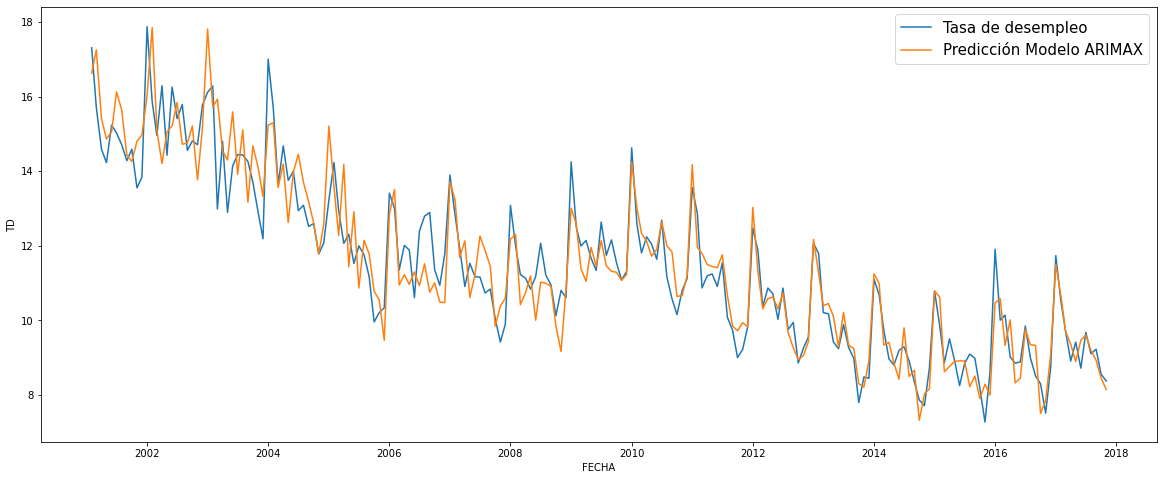

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches((20,8))

sns.lineplot(x=dftrain.index[1:], y=dftrain.TD[1:])
sns.lineplot(x=dftrain.index[1:], y=SARIMAX.fittedvalues[1:])
plt.legend(labels=['Tasa de desempleo', 'Predicción Modelo ARIMAX'], prop={'size': 15})

In [129]:
residuales2 = SARIMAX.resid[1:]

Text(0, 0.5, 'PACF')

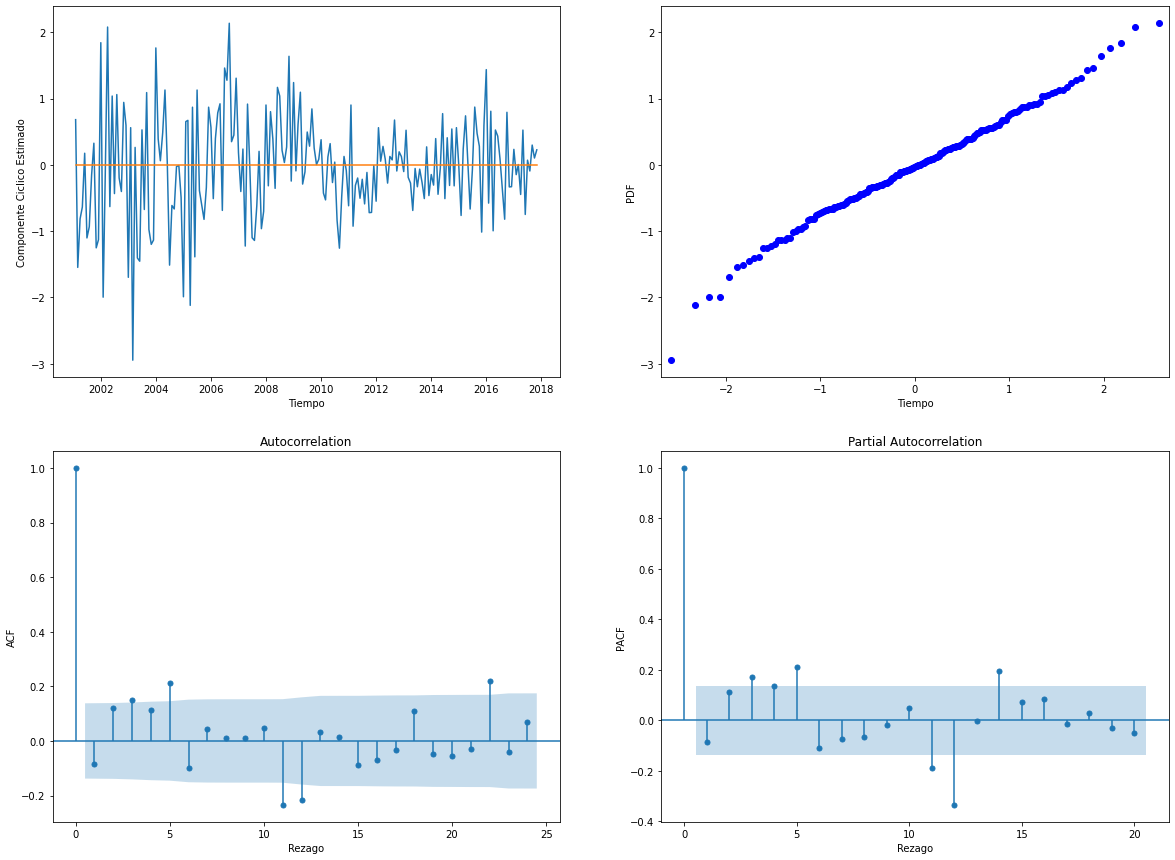

In [132]:
#Inspección gráfica

fig, ax =plt.subplots(2,2, figsize=(20, 15), sharex = False)

#FIG 0,0
sns.lineplot(y = residuales2, x = residuales2.index, dashes= True, err_style ="bars", ax = ax[0, 0])
sns.lineplot(y = np.zeros(len(residuales2)),  x = residuales2.index, dashes= True, err_style ="bars", ax = ax[0, 0])
ax[0,0].set_xlabel('Tiempo', fontsize=10)
ax[0,0].set_ylabel('Componente Ciclico Estimado', fontsize=10)



sm.qqplot(residuales2, ax=ax[0,1])
ax[0,1].set_xlabel('Tiempo', fontsize=10)
ax[0,1].set_ylabel('PDF', fontsize=10)

# sns.histplot(x = residuales2 , ax=ax[0,1], bins = 50, kde = True)
# ax[0,1].set_xlabel('Tiempo', fontsize=10)
# ax[0,1].set_ylabel('TD', fontsize=10)


#FIG 1
plot_acf(residuales2, ax = ax[1,0], alpha = 0.05)
ax[1,0].set_xlabel('Rezago', fontsize=10)
ax[1,0].set_ylabel('ACF', fontsize=10)

#FIG 2
plot_pacf(residuales2, ax = ax[1,1], lags  = 20, alpha = 0.05, method = "ols")
ax[1,1].set_xlabel('Rezago', fontsize=10)
ax[1,1].set_ylabel('PACF', fontsize=10)

Q-test

In [134]:
from statsmodels.stats.diagnostic import acorr_ljungbox as QTest

In [136]:
A = pd.DataFrame() #creamos un dataframe vacío

for i in range(5,16,5): #en un rango del 1 al 15 de 5 en 5 (...)
    B  = QTest(residuales2, lags=[i], return_df=True) #Estimamos la prueba para cada uno de los rezagos y (...)
    A = pd.concat([A,B]) # la concatenamos verticalmente con las demás pruebas

A

,lb_stat,lb_pvalue
5,21.182050,0.000748
10,24.085572,0.007376
15,48.071632,0.000025


Pronostico

In [145]:
SARIMAXF = SARIMAX.get_forecast(24) #FORMA 1: PREDECIMOS 19 PASOS ADELANTE
SARIMAXF = SARIMAXF.predicted_mean

In [146]:
UpCF1 = SARIMAX.get_forecast(steps = 24).conf_int(alpha = 0.025)["upper TD"] #intervalo superior
LoCF1 = SARIMAX.get_forecast(steps = 24).conf_int(alpha = 0.025)["lower TD"] #intervalo inferior

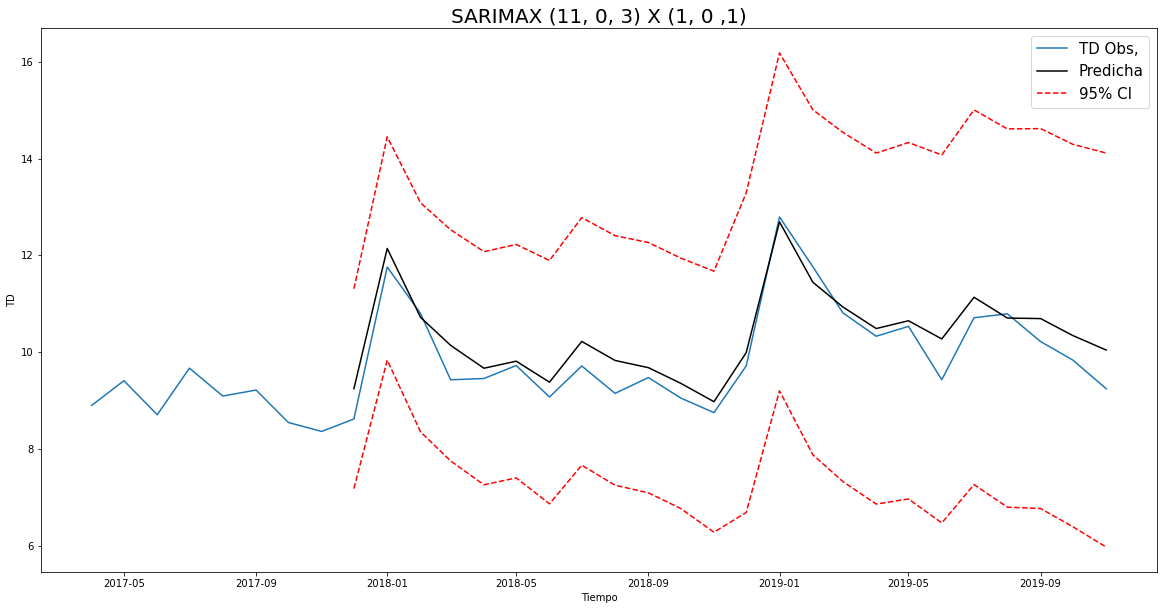

In [158]:
fig, ax =plt.subplots(1,1, figsize=(20, 10), sharex = False)


sns.lineplot(x=df.index[195:], y=df.TD[195:])
sns.lineplot(x=dftest.index, y=SARIMAXF,  color = "black")
sns.lineplot(x=dftest.index, y=UpCF1,color = "r", linestyle='--')
sns.lineplot(x=dftest.index, y=LoCF1,color = "r", linestyle='--')

ax.set_xlabel('Tiempo', fontsize=10)
ax.set_title("SARIMAX (11, 0, 3) X (1, 0 ,1)", fontsize=20)
ax.legend(["TD Obs,", "Predicha", "95% CI"], fontsize=15)

Residuales al cuadrado

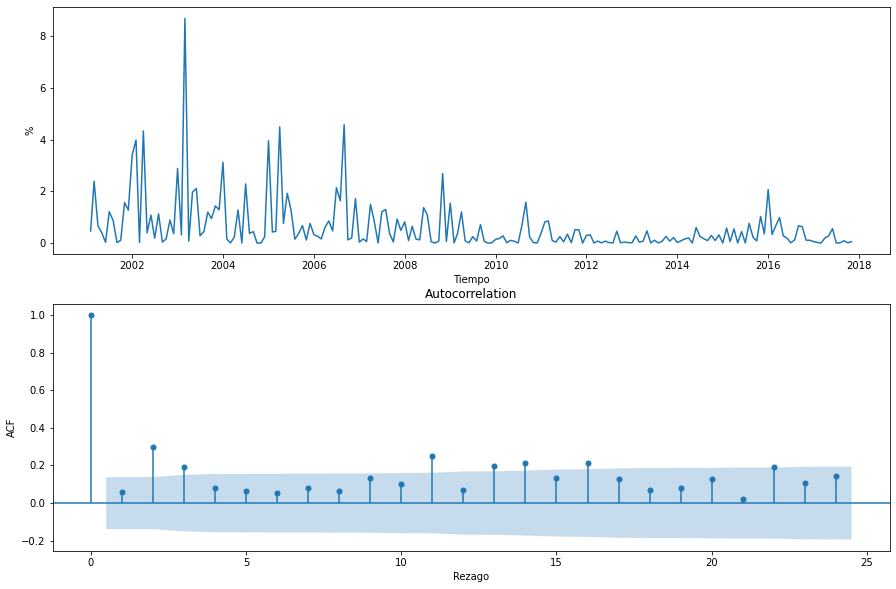

In [161]:
fig, ax =plt.subplots(2,1, figsize=(15, 10), sharex = False)

sns.lineplot(y = residuales2**2, x = residuales2.index, dashes= True, err_style ="bars", ax = ax[0])
ax[0].set_xlabel('Tiempo', fontsize=10)
ax[0].set_ylabel('%', fontsize=10)

plot_acf(residuales2**2, ax = ax[1], alpha = 0.05)
ax[1].set_xlabel('Rezago', fontsize=10)
ax[1].set_ylabel('ACF', fontsize=10)


fig.show()

In [162]:
A = pd.DataFrame() #creamos un dataframe vacío

for i in range(5,16,5): #en un rango del 1 al 15 de 5 en 5 (...)
    B  = QTest(residuales2**2, lags=[i], return_df=True) #Estimamos la prueba para cada uno de los rezagos y (...)
    A = pd.concat([A,B]) # la concatenamos verticalmente con las demás pruebas

A

,lb_stat,lb_pvalue
5,29.009808,2.308508e-05
10,37.877933,3.985400e-05
15,74.538072,6.860620e-10


GARCH